# 1\. Introdução
A Udemy é uma plataforma online de ensino que possui mais de 200 mil cursos abrangendo em torno de 75 idiomas. Neste notebook irei realizar uma análise dos cursos da Udemy.

#TODO  
Criar dashboard no **Power BI** ou **Tableau**.  
Usar SQL?

# 2\. Bibliotecas e Datasets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Polygon

In [4]:
# Dataset
udemy_cursos = pd.read_csv('data/udemy_cursos.csv') # https://www.kaggle.com/datasets/hossaingh/udemy-courses

In [5]:
udemy_cursos.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


# 3\. Dataset Udemy

Nesta seção será realizada a análise do dataset da Udemy

## 3\.1 Analisando o dataset

In [6]:
udemy_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [7]:
udemy_cursos.isna().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [8]:
# Altera a maneira que o Pandas mostra as colunas
pd.set_option('display.max_columns', 0) # default:0, None mostra todas as colunas
pd.set_option('display.max_colwidth', 50) # defaul:50, None mostra o conteúdo completo das colunas

In [9]:
# Converte os tipos de dados
udemy_cursos['num_subscribers'] = udemy_cursos['num_subscribers'].astype(int)
udemy_cursos['num_reviews'] = udemy_cursos['num_reviews'].astype(int)
udemy_cursos['num_comments'] = udemy_cursos['num_comments'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['num_lectures'] = udemy_cursos['num_lectures'].astype(int)
udemy_cursos['content_length_min'] = udemy_cursos['content_length_min'].astype(int)
udemy_cursos['published_time'] = pd.to_datetime(udemy_cursos['published_time'], dayfirst=False, errors = 'coerce')
udemy_cursos['last_update_date'] = pd.to_datetime(udemy_cursos['last_update_date'], format='%Y-%m-%d', errors = 'raise')

In [10]:
# Preenche os campos nulos
udemy_cursos = (udemy_cursos.fillna('-'))

In [11]:
udemy_cursos.dtypes

id                                float64
title                              object
is_paid                              bool
price                             float64
headline                           object
num_subscribers                     int32
avg_rating                        float64
num_reviews                         int32
num_comments                        int32
num_lectures                        int32
content_length_min                  int32
published_time        datetime64[ns, UTC]
last_update_date                   object
category                           object
subcategory                        object
topic                              object
language                           object
course_url                         object
instructor_name                    object
instructor_url                     object
dtype: object

In [12]:
udemy_cursos.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231,3.75,134,42,37,1268,2010-08-05 22:06:13+00:00,2020-11-06 00:00:00,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474,4.50,709,112,9,88,2010-01-12 18:09:46+00:00,-,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713,4.40,41,13,14,82,2010-10-13 18:07:17+00:00,2019-10-09 00:00:00,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988,4.80,395,88,36,1511,2011-06-20 20:08:38+00:00,2016-01-13 00:00:00,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266,4.75,38,12,38,569,2011-06-23 18:31:20+00:00,-,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [13]:
# Mostra as linhas que possuem campo nulo
udemy_cursos[udemy_cursos['last_update_date'].isna()]

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url


In [14]:
udemy_cursos.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [15]:
# Mostra a quantidade de cursos por categoria
udemy_cursos['category'].value_counts()

Development             31643
IT & Software           30479
Teaching & Academics    26293
Business                24670
Personal Development    21239
Design                  15256
Health & Fitness        11568
Marketing               11221
Lifestyle               10653
Finance & Accounting    10572
Office Productivity      6297
Music                    5977
Photography & Video      3866
Name: category, dtype: int64

In [16]:
# Mostra a quantidade de cursos por idioma
udemy_cursos['language'].value_counts().head(10)

English       123921
Portuguese     18471
Spanish        17428
Turkish         8100
Japanese        7006
German          6101
French          5465
Arabic          5197
Italian         3637
Russian         2686
Name: language, dtype: int64

## 3\.2 Visualizando o dataset

### Preço

In [ ]:
# Função para gerar moeda no padrão brasileiro
# locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8') 'en_us'
# locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8') 'en_us'
import locale

udemy_pago = len(udemy_cursos[udemy_cursos["is_paid"]==True])
udemy_gratis = len(udemy_cursos[udemy_cursos["is_paid"]==False])
udemy_total = len(udemy_cursos)

def format_currency(amount):
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
    locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')
    formatted_amount = locale.currency(amount, grouping=True)
    return formatted_amount

#print(f'Do total de {udemy_total:n} cursos, cerca de 90% ({udemy_pago:,}) dos cursos são pagos e 10% ({udemy_gratis:,}) são gratuitos.')
#print(f'Do total de {udemy_total:n} cursos, {format_currency(udemy_pago)} são pagos e {format_currency(udemy_gratis)} são gratuitos.')

In [17]:
udemy_price = (udemy_cursos['price'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%').head(5)
#udemy_price_real = udemy_cursos.loc[udemy_cursos['language'] == 'Portuguese']['price'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#udemy_price_dolar = udemy_cursos.loc[udemy_cursos['language'] == 'English']['price'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(f'Porcentagem de preço:\n{udemy_price}\n')
print('Cerca de 20% dos cursos custam $20 e apenas 8% custam $200')

Porcentagem de preço:
19.99     20.8%
0.00      10.4%
199.99     8.3%
99.99      4.8%
24.99      4.7%
Name: price, dtype: object

Cerca de 20% dos cursos custam $20 e apenas 8% custam $200


Os cursos com maior quantidade de matrículas custam $19.99 e $199.99


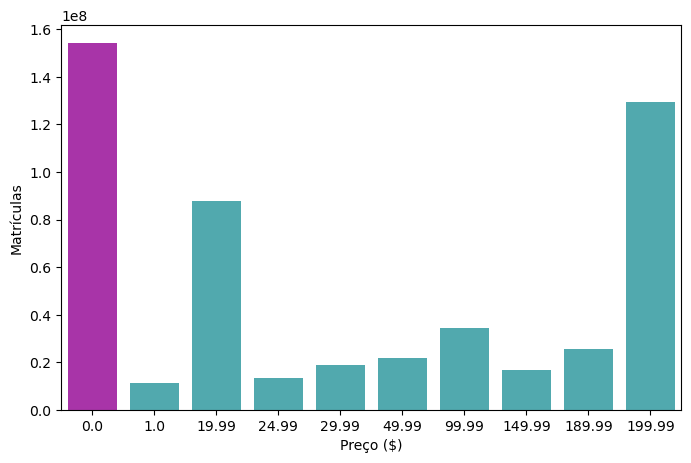

In [80]:
# Bar plot mostrando a distribuição de preço pelo número de matrículas
udemy_price_subscribers = (udemy_cursos.loc[udemy_cursos['price'] < 200]
        .groupby(by='price', as_index=False)['num_subscribers']
        .sum()
        .sort_values(by='num_subscribers',ascending=False))

plt.figure(figsize=(8,5), dpi=100)
ax = sns.barplot(data=udemy_price_subscribers[:10], x='price', y='num_subscribers', color='#42b7bd')
ax.set(xlabel='Preço ($)', ylabel='Matrículas')
patch_h = [patch.get_height() for patch in ax.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

ax.patches[idx_tallest].set_facecolor('#a834a8')  

print('Os cursos com maior quantidade de matrículas custam $19.99 e $199.99')

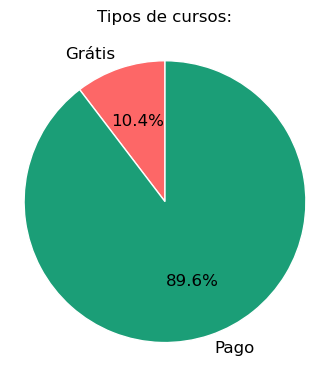

Do total de 209734 cursos, cerca de 90% (187,996) dos cursos são pagos e 10% (21,738) são gratuitos.


In [21]:
# Visualização em pizza da porcentagem de cursos grátis e pagos.
plt.figure(figsize = (4, 4))
plt.pie(udemy_cursos.groupby(['is_paid']).size(),
        labels = ['Grátis', 'Pago'], 
        autopct = '%1.1f%%',
        startangle = 90, colors = ['#fd6767','#1b9e77'],
        textprops = {'size': 12},
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.axis('equal')
plt.title('Tipos de cursos:\n',loc='center', fontdict={'fontsize': 12})
plt.show()

print(f'Do total de {udemy_total:n} cursos, cerca de 90% ({udemy_pago:,}) dos cursos são pagos e 10% ({udemy_gratis:,}) são gratuitos.')

In [59]:
import plotly.express as px
# Top 15 languages
share_of_languages_top_10 = round(udemy_cursos['is_paid'].value_counts() * 100 / len(udemy_cursos), 2)[:10]

# Pie chart for top 15 languages visualization
fig = px.pie(share_of_languages_top_10, values=share_of_languages_top_10.values, 
             names=['Pago', 'Grátis'],
             hole=0.25,
            )
fig.update_traces(textposition='inside', texttemplate = '%{label}<br>%{value}%', rotation=150)
fig.update_layout(title_text='Top 10 idiomas por curso', title_x=0.5, showlegend=False)
fig.show()

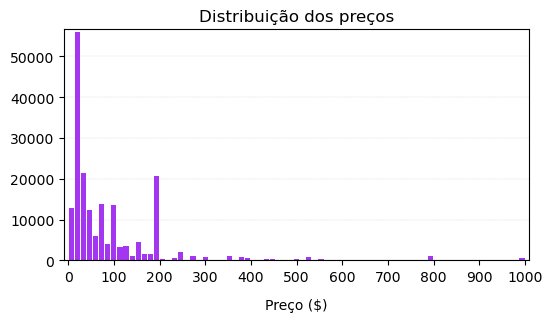

A maioria dos cursos possui valor inferior a $200


In [22]:
# Distribuição dos preços dos cursos
plt.figure(figsize = (6, 3), dpi=100)
plt.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'], bins=75, rwidth=0.85, color='#A435F0')
#sns.histplot(data=udemy_cursos[udemy_cursos['is_paid']==True], x='price', bins=75, color='#A435F0')
plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1001,100))
plt.margins(0.01)
plt.xlabel("Preço ($)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços',loc='center', fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

print('A maioria dos cursos possui valor inferior a $200')

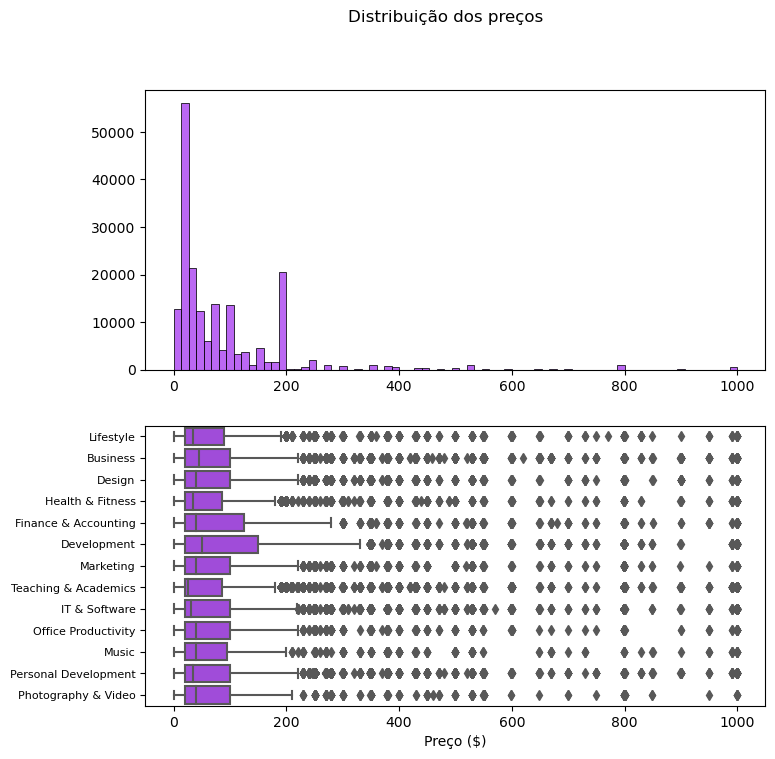

A maioria dos cursos possui valor inferior a $200


In [23]:
# Distribuição dos preços dos cursos
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8, 8))
#ax1.hist(udemy_cursos[udemy_cursos['is_paid']==True]['price'], bins=75, rwidth=0.85, color='#A435F0')
sns.histplot(ax=ax1, data=udemy_cursos[udemy_cursos['is_paid']==True], x='price', bins=75, color='#A435F0')
sns.boxplot(ax=ax2, data=udemy_cursos, x=udemy_cursos['price'], y=udemy_cursos['category'], color='#A435F0')
fig.suptitle('Distribuição dos preços')

# get label text
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()

ax1.set(xlabel='', ylabel='')
ax2.set(xlabel='Preço ($)', ylabel='')
ax2.set_xlabel('Preço ($)',size=10)
ax2.set_yticklabels(ylabels, size = 8)

plt.show()

print('A maioria dos cursos possui valor inferior a $200')

In [24]:
udemy_pago_200 = udemy_cursos.loc[udemy_cursos['is_paid'] < 200 ]
udemy_pago_200.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.097340e+05,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.015403e+06,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,1.342558e+06,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.950734e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,3.292863e+06,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,4.189458e+06,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


In [25]:
udemy_cursos.price.describe().transpose()

count    209734.000000
mean         81.665529
std         117.317846
min           0.000000
25%          19.990000
50%          34.990000
75%          99.990000
max         999.990000
Name: price, dtype: float64

In [26]:
udemy_cursos.price.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

19.99     20.8%
0.00      10.4%
199.99     8.3%
99.99      4.8%
24.99      4.7%
          ...  
72.00      0.0%
53.98      0.0%
45.00      0.0%
68.98      0.0%
369.90     0.0%
Name: price, Length: 236, dtype: object

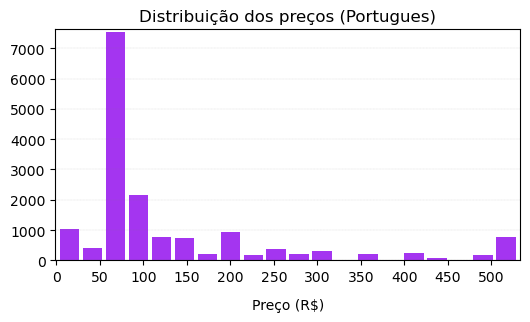

In [27]:
# Distribuição dos preços dos cursos em Português
plt.figure(figsize = (6, 3))
plt.hist(udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='Portuguese')]['price'],
         bins=20,
         rwidth=0.85,
         color='#A435F0')
plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,551,50))
plt.margins(0.01)
plt.xlabel("Preço (R$)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços (Portugues)',loc='center', fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

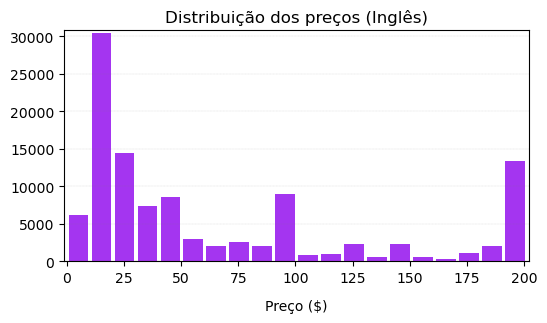

In [28]:
# Distribuição dos preços dos cursos em Inglês
plt.figure(figsize = (6, 3))
plt.hist(udemy_cursos[(udemy_cursos['is_paid']==True) & (udemy_cursos['language']=='English')]['price'],
         bins=20,
         rwidth=0.85,
         range=(0,201),
         color='#A435F0')
plt.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1)
#plt.xticks(range(0,301,0))

plt.margins(0.01)
plt.xlabel("Preço ($)", labelpad=10)
plt.ylabel("")
plt.title('Distribuição dos preços (Inglês)',loc='center', fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

#### Conclusão

Cerca de 90% (187,996) dos cursos são pagos e 10% (21,738) são gratuitos.  
A maioria dos cursos possui o valor inferior a $200.  
Os cursos pagos com maior quantidade de matrículas custam $19.99 e $199.99.  
Os cursos que custam $19.99 equivalem a 20% do total de cursos  
Os cursos que custam $199.99 equivalem apenas 8% do total de cursos.

### Idioma

In [29]:
# Top 10 idiomas por curso
udemy_c = (udemy_cursos.groupby(['language'], as_index=False)
           .size()
           .sort_values(by='size',ascending=False)
           .rename(columns={'language':'Idioma', 'size':'Quantidade'}))
print('Top 10 cursos por idioma:')
print(udemy_c[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 cursos por idioma:
╭────────────┬──────────────╮
│ Idioma     │   Quantidade │
├────────────┼──────────────┤
│ English    │       123921 │
│ Portuguese │        18471 │
│ Spanish    │        17428 │
│ Turkish    │         8100 │
│ Japanese   │         7006 │
│ German     │         6101 │
│ French     │         5465 │
│ Arabic     │         5197 │
│ Italian    │         3637 │
│ Russian    │         2686 │
╰────────────┴──────────────╯


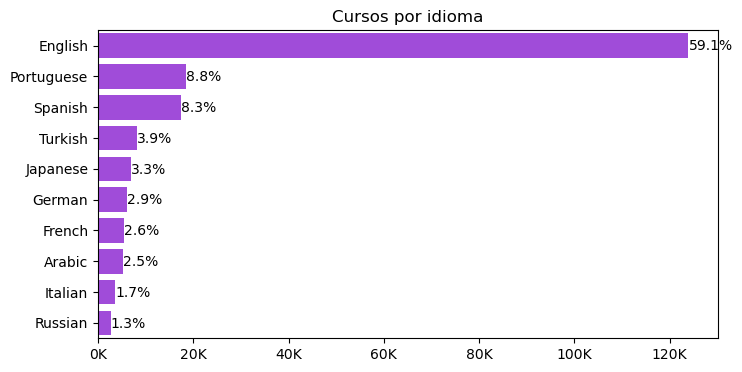

<AxesSubplot: xlabel='Quantidade', ylabel='Idioma'>

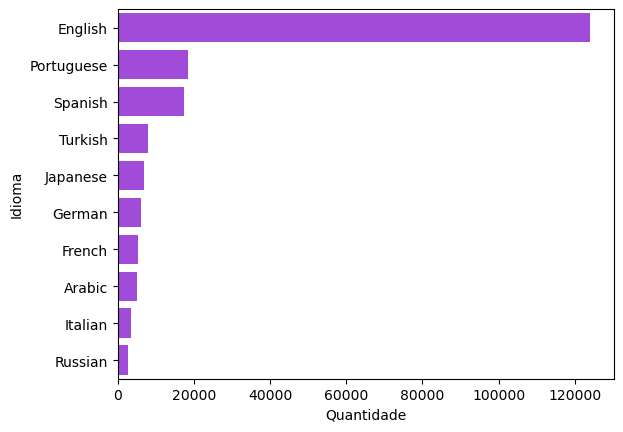

In [40]:
# Top 10 idiomas por curso em gráfico
fig, ax = plt.subplots(figsize=(8, 4)) 
sns.countplot(data=udemy_cursos, y='language', order=udemy_cursos['language'].value_counts().index[:10], color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.xlabel("")
plt.ylabel("")
plt.title("Cursos por idioma", fontdict={'fontsize': 12})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda

# orcentagem
total = len(udemy_cursos['language'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() - 0.25
        ax.annotate(percentage, (x, y))
      
plt.show()

sns.barplot(data=udemy_c[:10], x='Quantidade', y='Idioma', orient='h', color='#A435F0')

In [44]:
import plotly.express as px
# Top 15 languages
share_of_languages_top_10 = round(udemy_cursos['language'].value_counts() * 100 / len(udemy_cursos), 2)[:10]

# Pie chart for top 15 languages visualization
fig = px.pie(share_of_languages_top_10, values=share_of_languages_top_10.values, 
             names=share_of_languages_top_10.index, hole=0.25,
            )
fig.update_traces(textposition='inside', texttemplate = '%{label}<br>%{value}%', rotation=150)
fig.update_layout(title_text='Top 10 idiomas por curso', title_x=0.5, showlegend=False)
fig.show()

In [33]:
share_of_languages_top_15

English                59.08
Portuguese              8.81
Spanish                 8.31
Turkish                 3.86
Japanese                3.34
German                  2.91
French                  2.61
Arabic                  2.48
Italian                 1.73
Russian                 1.28
Hindi                   0.84
Korean                  0.79
Indonesian              0.75
Polish                  0.73
Traditional Chinese     0.48
Name: language, dtype: float64

### Duração

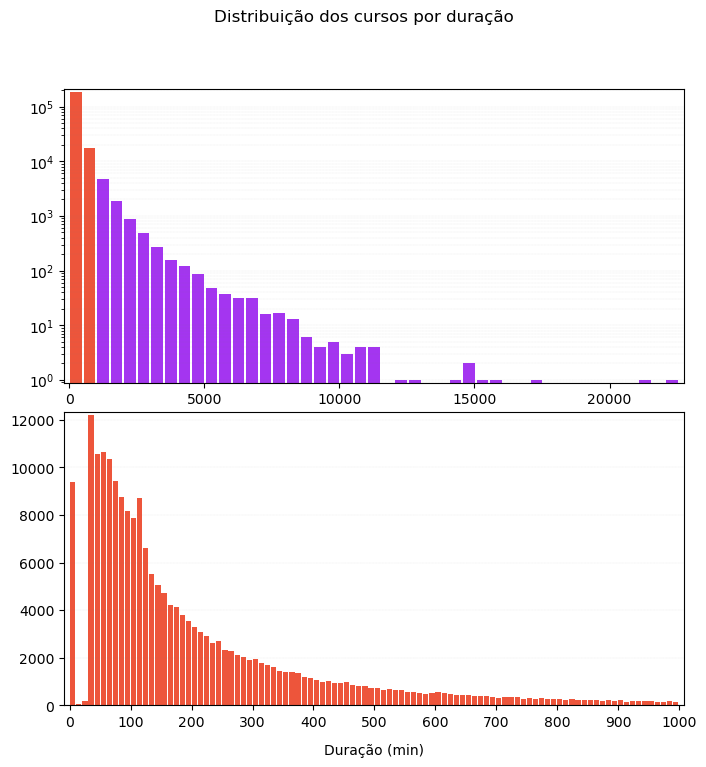

In [23]:
# Distribuição da duração dos cursos
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (8, 8))
N, bins, patches = ax1.hist(udemy_cursos['content_length_min'], rwidth=0.85, bins=45, color='#A435F0')

ax1.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, which='both', alpha = 0.6)
ax1.margins(0.01)

patches[0].set_facecolor('#ed553b')
patches[1].set_facecolor('#ed553b')

plt.sca(ax1)
plt.yscale('log')
plt.ylabel("")

ax2.hist(udemy_cursos[udemy_cursos['content_length_min']<1000]['content_length_min'], rwidth=0.85, bins=100, color='#ed553b')
ax2.grid(axis='y', color ='Grey', linestyle ='-.', linewidth = 0.1, alpha = 0.6)
ax2.margins(0.01)

plt.sca(ax2)
plt.xlabel("Duração (min)", labelpad=10)
plt.ylabel("")
plt.xticks(range(0,1001,100))
plt.subplots_adjust(hspace=0.1)
plt.suptitle('Distribuição dos cursos por duração')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

### Categoria

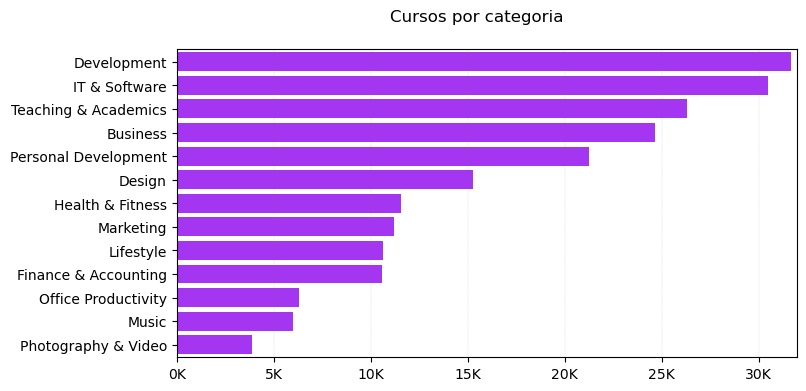

In [24]:
# Categoria pela quantidade de cursos
udemy_a = udemy_cursos.groupby(['category']).size().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_a.index, udemy_a, color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plt.margins(0.01)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Cursos por categoria')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.show()

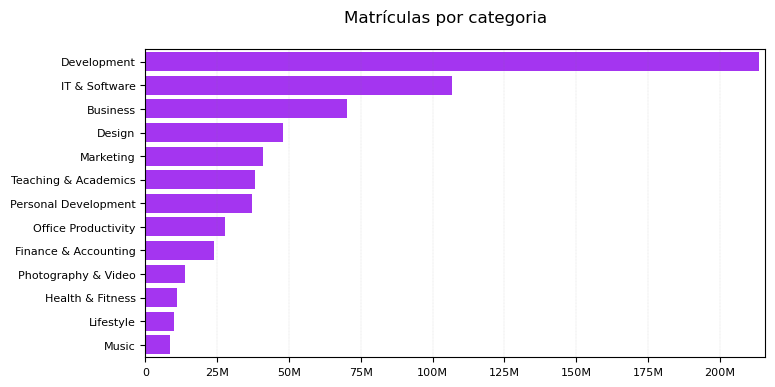

In [25]:
# Categoria pela quantidade de matriculados
udemy_b = udemy_cursos.groupby(['category']).sum(numeric_only=True).sort_values(by='num_subscribers',ascending=True)
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.barh(udemy_b.index, udemy_b['num_subscribers'], color='#A435F0')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M' if x!=0 else 0))
plt.margins(0.01)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Matrículas por categoria')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)   # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.show()

### Matricula

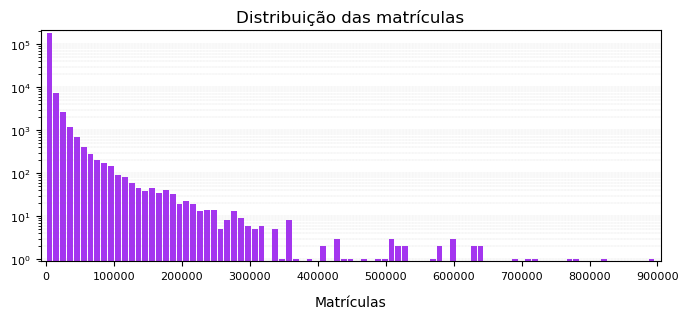

In [26]:
# Distribuição dos matriculados por curso
plt.figure(figsize = (8, 3))
plt.hist(udemy_cursos[(udemy_cursos['num_subscribers']>0) & (udemy_cursos['num_subscribers']<1e6)]['num_subscribers'],
         bins=89, 
         rwidth=0.85, 
         color='#A435F0')
plt.grid(axis='y', color ='Grey', which='both', linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1000001,100000))
plt.margins(0.01)
plt.xlabel("Matrículas", labelpad=10)
plt.yscale('log')
plt.title('Distribuição das matrículas',loc='center')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamanho da fonte dos rótulos do eixo x e y
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo x
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # tamanho da fonte do eixo y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamanho da fonte da legenda
plt.show()

### Data

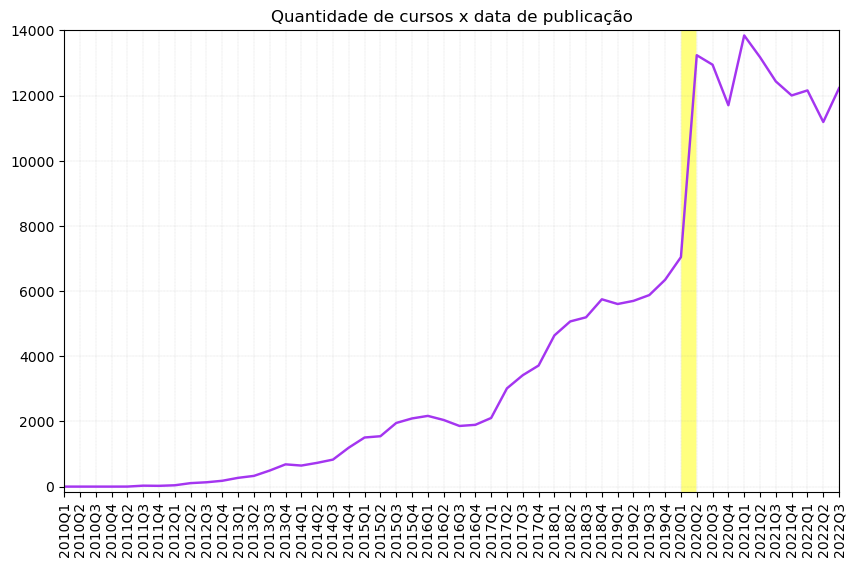

In [27]:
# Quantidade de cursos pela data
udemy_cursos['published_QDate'] = pd.PeriodIndex(udemy_cursos.published_time, freq='Q')
udemy_publish = udemy_cursos.groupby(['published_QDate'], as_index=False).size().sort_values(by='published_QDate')
udemy_publish['published_QDate'] = udemy_publish['published_QDate'].apply(str)
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(udemy_publish.index[:-1], udemy_publish['size'][:-1], color='#A435F0', linewidth=1.75)
plt.margins(x=0, y=0.012)
#plt.ylabel("Quantidade de cursos", labelpad=5, fontsize=12)
#plt.xlabel("Data de publicação", labelpad=10, fontsize=12)
plt.xticks(udemy_publish.index[:-1])
plt.xticks(rotation = 90)

ax.set_xticklabels(list(udemy_publish['published_QDate'][:-1]))
plt.grid(color ='Grey',
        linestyle ='-.', linewidth = 0.1)

# cria uma linha amarela entre os vértices 39 e 40 para destaque
verts = [(udemy_publish.index[39], -1000), (udemy_publish.index[39], udemy_publish['size'][39]+10000), 
         (udemy_publish.index[40], udemy_publish['size'][40]+10000),(udemy_publish.index[40], -1000)]
poly = Polygon(verts, facecolor ='yellow',
               edgecolor ='1.0', alpha = 0.5)
ax.add_patch(poly)

plt.title('Quantidade de cursos x data de publicação',loc='center', fontdict={'fontsize': 12})
plt.show()

### Top 10

In [28]:
# Top 10  tópico por quantidade de cursos
udemy_topic = (udemy_cursos.groupby(['topic'], as_index=False)
           .size()
           .sort_values(by='size',ascending=False)
           .rename(columns={'topic':'Tópico', 'size':'Quantidade'}))
print('Top 10 tópicos por quantidade de cursos:')
print(udemy_topic[:10].to_markdown(tablefmt="rounded_outline", index=False))

Top 10 tópicos por quantidade de cursos:
╭─────────────────────────┬──────────────╮
│ Tópico                  │   Quantidade │
├─────────────────────────┼──────────────┤
│ Python                  │         2553 │
│ Excel                   │         2072 │
│ English Language        │         1495 │
│ WordPress               │         1442 │
│ Math                    │         1341 │
│ Photoshop               │         1294 │
│ Microsoft Certification │         1232 │
│ Java                    │         1128 │
│ JavaScript              │         1092 │
│ Personal Development    │          978 │
╰─────────────────────────┴──────────────╯


In [29]:
# Top 10 tópico por matriculas
udemy_subs = (udemy_cursos.groupby(['topic'], as_index=False)
              .sum(numeric_only=True)
              .sort_values(by='num_subscribers',ascending=False)
              .rename(columns={'topic':'Tópico', 'num_subscribers': 'Matrículas'}))
print('Top 10 tópicos por quantidade de matrículas:')
print(udemy_subs[:10][['Tópico', 'Matrículas']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 tópicos por quantidade de matrículas:
╭─────────────────────┬──────────────╮
│ Tópico              │   Matrículas │
├─────────────────────┼──────────────┤
│ Python              │     32516280 │
│ Excel               │     12822452 │
│ JavaScript          │     11801744 │
│ Java                │     11203723 │
│ Web Development     │      9293697 │
│ Photoshop           │      8976024 │
│ Ethical Hacking     │      8280273 │
│ WordPress           │      7080627 │
│ CSS                 │      6482557 │
│ Android Development │      5567763 │
╰─────────────────────┴──────────────╯


In [30]:
my_cols = ['title', 'instructor_name', 'price', 'num_reviews', 'num_subscribers', 'num_comments', 'content_length_min']

def top5_courses(df, col):
    top5_df = df.nlargest(5, col).reset_index(drop=True)
    return top5_df[my_cols]

In [31]:
top5_courses(udemy_cursos, 'num_reviews')

,title,instructor_name,price,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,199.99,436457,1612862,39040,1333
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,149.99,332598,1108811,36101,1264
2,The Web Developer Bootcamp 2022,Colt Steele,199.99,246624,823805,31001,3827
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,199.99,228108,771176,27723,3939
4,Angular - The Complete Guide (2022 Edition),Maximilian Schwarzmüller,189.99,172991,626304,24886,2082


In [32]:
# Top 10 cursos por quantidade de avaliações
udemy_review = (udemy_cursos.groupby(['title'], as_index=False)
              .sum(numeric_only=True)
              .sort_values(by='num_reviews',ascending=False)
              .rename(columns={'title':'Título', 'num_reviews': 'Avaliações'}))
print('Top 10 tópicos por quantidade de matrículas:')
print(udemy_review[:10][['Título', 'Avaliações']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 tópicos por quantidade de matrículas:
╭──────────────────────────────────────────────────────────────┬──────────────╮
│ Título                                                       │   Avaliações │
├──────────────────────────────────────────────────────────────┼──────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python    │       436607 │
│ Microsoft Excel - Excel from Beginner to Advanced            │       332598 │
│ The Web Developer Bootcamp 2022                              │       246624 │
│ The Complete 2022 Web Development Bootcamp                   │       228108 │
│ Angular - The Complete Guide (2022 Edition)                  │       172991 │
│ Java Programming Masterclass covering Java 11 & Java 17      │       170478 │
│ React - The Complete Guide (incl Hooks, React Router, Redux) │       163324 │
│ Machine Learning A-Z™: Hands-On Python & R In Data Science   │       162432 │
│ The Complete Digital Marketing Course - 12 Courses in 1      │       1549

In [33]:
# Função para gerar os Top 10
def top10_courses(df, col):
    col_map = {
        'num_reviews': 'Avaliações',
        'num_subscribers': 'Matrículas',
        'num_comments': 'Comentários'
    }
    col_newname = col_map.get(col)
    if not col_newname:
        return "Coluna não existe."
    
    renamed_columns = {'title': 'Curso', 'instructor_name': 'Instrutor', 'avg_rating': 'Nota', col: col_newname}
    top10_df = df.sort_values(col, ascending=False).reset_index(drop=True)[:10]
    
    print(f"Top 10 cursos por quantidade de {col_newname}")
    print((top10_df[['title', 'instructor_name', 'avg_rating', col]]
           .rename(columns=renamed_columns)
           .to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f')))


In [34]:
top10_courses(udemy_cursos, 'num_reviews')

Top 10 cursos por quantidade de Avaliações
╭──────────────────────────────────────────────────────────────┬───────────────────────────────────────┬────────┬──────────────╮
│ Curso                                                        │ Instrutor                             │   Nota │   Avaliações │
├──────────────────────────────────────────────────────────────┼───────────────────────────────────────┼────────┼──────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python    │ Jose Portilla                         │      5 │       436457 │
│ Microsoft Excel - Excel from Beginner to Advanced            │ Kyle Pew                              │      5 │       332598 │
│ The Web Developer Bootcamp 2022                              │ Colt Steele                           │      5 │       246624 │
│ The Complete 2022 Web Development Bootcamp                   │ Dr. Angela Yu                         │      5 │       228108 │
│ Angular - The Complete Guide (2022 Edition)         

In [35]:
top10_courses(udemy_cursos, 'num_subscribers')

Top 10 cursos por quantidade de Matrículas
╭────────────────────────────────────────────────────────────┬─────────────────┬────────┬──────────────╮
│ Curso                                                      │ Instrutor       │   Nota │   Matrículas │
├────────────────────────────────────────────────────────────┼─────────────────┼────────┼──────────────┤
│ Java Tutorial for Complete Beginners                       │ John Purcell    │      4 │      1752364 │
│ 2022 Complete Python Bootcamp From Zero to Hero in Python  │ Jose Portilla   │      5 │      1612862 │
│ Microsoft Excel - Excel from Beginner to Advanced          │ Kyle Pew        │      5 │      1108811 │
│ Automate the Boring Stuff with Python Programming          │ Al Sweigart     │      5 │      1056369 │
│ Machine Learning A-Z™: Hands-On Python & R In Data Science │ Kirill Eremenko │      5 │       896340 │
│ The Web Developer Bootcamp 2022                            │ Colt Steele     │      5 │       823805 │
│ Introducti

In [36]:
top10_courses(udemy_cursos, 'num_comments')

Top 10 cursos por quantidade de Comentários
╭────────────────────────────────────────────────────────────┬──────────────────────────┬────────┬───────────────╮
│ Curso                                                      │ Instrutor                │   Nota │   Comentários │
├────────────────────────────────────────────────────────────┼──────────────────────────┼────────┼───────────────┤
│ 2022 Complete Python Bootcamp From Zero to Hero in Python  │ Jose Portilla            │      5 │         39040 │
│ Microsoft Excel - Excel from Beginner to Advanced          │ Kyle Pew                 │      5 │         36101 │
│ The Web Developer Bootcamp 2022                            │ Colt Steele              │      5 │         31001 │
│ The Complete 2022 Web Development Bootcamp                 │ Dr. Angela Yu            │      5 │         27723 │
│ The Complete Digital Marketing Course - 12 Courses in 1    │ Rob Percival             │      5 │         27540 │
│ Angular - The Complete Guide (2022

In [37]:
# Vendas
udemy_cursos['earned'] = udemy_cursos['price']*udemy_cursos['num_subscribers']
print("Total de vendas da Udemy: ", end='')
print(round(udemy_cursos.earned.sum()/1e9,2),'bilhões de dólares')

Total de vendas da Udemy: 59.93 bilhões de dólares


In [38]:
udemy_teacher = udemy_cursos.groupby(['instructor_url'], as_index=False).sum(numeric_only=True)
udemy_teacher2 = (udemy_teacher.sort_values(by='earned',ascending=False)
                  .join(udemy_cursos[['instructor_url', 'instructor_name']].set_index('instructor_url'), on='instructor_url').drop_duplicates()
                  .rename(columns={'instructor_name':'Professor', 'instructor_url':'URL do professor', 'earned':'Lucro'}))
print('Top 10 professores com maior lucro ($):')
print(udemy_teacher2[0:10][['Professor', 'URL do professor', 'Lucro']].to_markdown(tablefmt="rounded_outline", index=False,floatfmt=',.0f'))

Top 10 professores com maior lucro ($):
╭────────────────────────┬─────────────────────────────────────────────┬───────────────╮
│ Professor              │ URL do professor                            │         Lucro │
├────────────────────────┼─────────────────────────────────────────────┼───────────────┤
│ Srinidhi Ranganathan   │ /user/srinidhi-ranganathan/                 │ 1,735,131,640 │
│ Learn Tech Plus        │ /user/josh-werner/                          │ 1,198,360,878 │
│ TJ Walker              │ /user/tjwalker2/                            │ 1,171,615,935 │
│ Jose Portilla          │ /user/joseportilla/                         │   818,904,784 │
│ YouAccel Training      │ /user/youaccel/                             │   801,222,163 │
│ Creative Online School │ /user/mahbubur-rahman-9/                    │   638,075,198 │
│ Robert (Bob) Steele    │ /user/c91d6786-95f3-48d8-ab94-cc92431d2aa4/ │   629,703,391 │
│ Kirill Eremenko        │ /user/kirilleremenko/                      

In [39]:
reviews = udemy_cursos[['title','num_reviews','num_lectures','topic']]

reviews
#df.groupby(['Courses','Fee']).count()

,title,num_reviews,num_lectures,topic
0,Online Vegan Vegetarian Cooking School,134,37,Vegan Cooking
1,The Lean Startup Talk at Stanford E-Corner,709,9,Lean Startup
2,"How To Become a Vegan, Vegetarian, or Flexitarian",41,14,Vegan Cooking
3,How to Train a Puppy,395,36,Pet Training
4,Web Design from the Ground Up,38,38,Web Design
...,...,...,...,...
209729,Let's Speak Urdu - The Urdu Grammar,0,5,Urdu Language
209730,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,0,0,CompTIA Linux+
209731,CISSP 4 full exams #1 : All CISSP domains - 12...,0,0,CISSP - Certified Information Systems Security...
209732,JD Edwards EnterpriseOne Fixed Assets Accounti...,0,9,Financial Accounting


<AxesSubplot: xlabel='num_lectures', ylabel='num_reviews'>

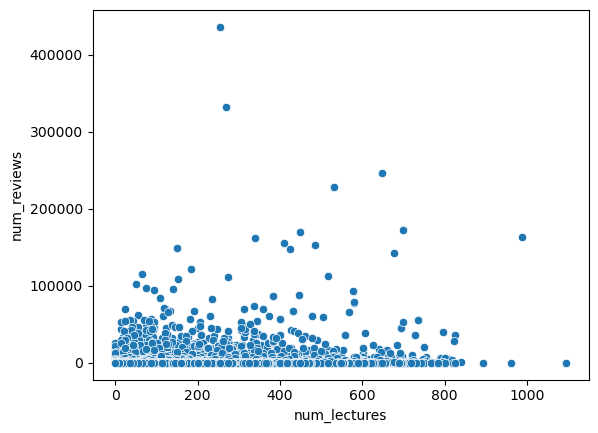

In [40]:
sns.scatterplot(x = 'num_lectures', y = 'num_reviews', data = reviews)

In [41]:
curso = udemy_cursos.groupby(['topic','num_subscribers'])['num_reviews'].sum().sort_values(ascending=False)

curso2 = udemy_cursos.groupby(['topic']).agg({'num_reviews':'sum','num_subscribers':'sum'}).reset_index().sort_values(by=['num_subscribers'],ascending=False).head(10)
curso2
#df.groupby(['Courses','Fee']).count()

,topic,num_reviews,num_subscribers
2795,Python,2670370,32516280
1200,Excel,1409273,12822452
1794,JavaScript,904265,11801744
1779,Java,944527,11203723
3676,Web Development,1060685,9293697
2618,Photoshop,371352,8976024
1193,Ethical Hacking,385783,8280273
3735,WordPress,295251,7080627
569,CSS,432756,6482557
213,Android Development,344513,5567763


<AxesSubplot: xlabel='num_reviews', ylabel='num_subscribers'>

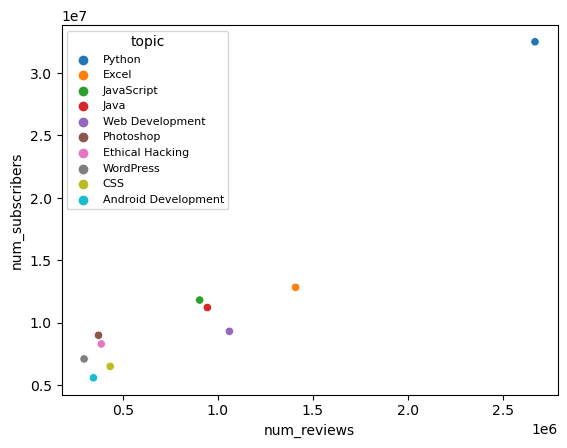

In [42]:
sns.scatterplot(x = 'num_reviews', y = 'num_subscribers', data = curso2, hue='topic')
# Muitos que compram um curso de Python tende a terminá-lo/avaliá-lo
# Os cursos de Web Development e Photoshop possuem quantidades semelhantes de cursos comprados,
# O curso de Photoshop possui bem menos avaliações se comparado ao de Web Development
# Muitos alunos de Photoshop tendem a comprar mas não terminar/avaliar o curso.

In [43]:
sns.barplot(x = 'counts', y = 'category-subject-area', data = coursera_category, color='#A435F0', edgecolor='white', linewidth=1.5)
plt.xlabel("")
plt.ylabel("")
plt.title("Assunto por Quantidade")

NameError: name 'coursera_category' is not defined

# 4\. Conclusões

90

# Exportando os dados

In [ ]:
# Exporta o dataset final
udemy_cursos.to_csv('data/udemy_cursos_final.csv', sep =';', index=False)